### LOAD AND PLOT DATA FROM A SESSION #### 
This notebook should run from within the iblenv.
The functions are taken from the source code of the IBL library. 

For documentation check:

https://int-brain-lab.github.io/iblenv/_autosummary/ibllib.io.raw_data_loaders.html?highlight=raw%20data%20loaders#module-ibllib.io.raw_data_loaders



In [1]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
# @Author: Mora Ogando
# @Date: Sunday, July 4th 2021, 1:28:46 pm
"""

Raw Data Loader functions for PyBpod rig

Module contains one loader function per raw datafile
"""
#import things
import json
import logging
import wave
from datetime import datetime
from pathlib import Path
from typing import Union
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools
from glob import glob
import pickle
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

from ibllib.io import raw_data_loaders
from ibllib.misc import version
# Helpers Mori

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w



# TODO:

## Mean session performance as a function of the session number, color coded by the "stage" of training (habituation, repeat on error ON, repeat on error OFF, contrasts) for each mouse.
## Mean session performance as a function of the session number for all mice together, color code mice by training cohort (we're now in our third cohort).
## Response time as a function of contrast for the multicontrast phase.

# Find good sessions for each mouse

In [2]:
# find data
basePath  = r'Z:\moraogando\IBLdata\Current_Mice_(Mike)//'
subdirs = glob(r'Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBO*')
AllMice = [s.split('\\')[-1] for s in subdirs]

mouseList = AllMice

allSessionsMice = []
imouse = 0

for imouse in range(0,len(mouseList)):
    fullpath = basePath+mouseList[imouse ]+'//*//*//raw_behavior_data//_iblrig_encoderTrialInfo.raw.ssv'
    allsessions = glob(fullpath,recursive=True)

    # preallocate the info for each file
    filePath = []
    mouse = []
    date = []
    session = []
    size = [] # ---> important, get the size of the file so that we can filter by that later on


    # loop over the file name to extract the relevant info
    for thisData in allsessions:
        filePath.append(thisData)
        mouse.append( thisData.split(basePath)[-1].split('\\')[0])
        date.append(thisData.split(basePath)[-1].split('\\')[1])
        session.append(thisData.split(basePath)[-1].split('\\')[2])
        size.append((os.path.getsize(thisData))/1000)

        print(f' DataPath: {thisData} , \nMouse: {mouse[-1]},Date:{date[-1]},session: {session[-1]}, fileSize:{size[-1]}')

    # Create a dictionary with the info for this mouse
    ThisDict = {'DataPath': filePath,'Mouse': mouse,'Date':date,'session': session, 'fileSize (MB)':size}
    # Turn it into a DF
    MouseTrainingDF = pd.DataFrame(ThisDict)

    # Get the largest file for each date (We assume that's the one we want to analyze)
    BestSessionDay = MouseTrainingDF.groupby(['Date']).max().reset_index()
    print(f'this mouse trained for a total of {len(BestSessionDay)} sessions')

    allSessionsMice.append(BestSessionDay)

 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-02-12\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_503,Date:2023-02-12,session: 001, fileSize:26.253
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-02-13\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_503,Date:2023-02-13,session: 001, fileSize:0.069
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-02-13\002\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_503,Date:2023-02-13,session: 002, fileSize:27.505
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-02-14\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_503,Date:2023-02-14,session: 001, fileSize:32.305
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-02-16\004\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_503,Date:2023-02-16,session: 004, fileSize:0.485
 DataPath: Z

 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-05-18\006\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_503,Date:2023-05-18,session: 006, fileSize:37.014
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-05-19\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_503,Date:2023-05-19,session: 001, fileSize:1.834
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-05-19\002\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_503,Date:2023-05-19,session: 002, fileSize:0.821
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-05-19\003\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_503,Date:2023-05-19,session: 003, fileSize:3.09
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-05-19\004\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_503,Date:2023-05-19,session: 004, fileSize:0.0
 DataPath: Z:\mor

 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-02-06\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_505,Date:2023-02-06,session: 001, fileSize:16.3
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-02-07\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_505,Date:2023-02-07,session: 001, fileSize:17.662
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-02-08\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_505,Date:2023-02-08,session: 001, fileSize:19.296
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-02-10\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_505,Date:2023-02-10,session: 001, fileSize:22.406
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-02-12\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_505,Date:2023-02-12,session: 001, fileSize:10.647
 DataPath: Z

 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-06-06\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_505,Date:2023-06-06,session: 001, fileSize:0.325
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-06-06\002\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_505,Date:2023-06-06,session: 002, fileSize:1.634
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-06-06\003\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_505,Date:2023-06-06,session: 003, fileSize:0.155
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-06-06\004\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_505,Date:2023-06-06,session: 004, fileSize:0.073
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-06-06\005\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_505,Date:2023-06-06,session: 005, fileSize:10.278
 DataPath: Z:\

 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_513\2023-04-24\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_513,Date:2023-04-24,session: 001, fileSize:0.233
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_513\2023-04-24\002\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_513,Date:2023-04-24,session: 002, fileSize:1.472
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_513\2023-04-24\003\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_513,Date:2023-04-24,session: 003, fileSize:41.434
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_513\2023-04-27\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_513,Date:2023-04-27,session: 001, fileSize:22.437
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_513\2023-05-02\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_513,Date:2023-05-02,session: 001, fileSize:35.052
 DataPath: Z

 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_513\2023-05-31\012\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_513,Date:2023-05-31,session: 012, fileSize:4.98
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_513\2023-06-01\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_513,Date:2023-06-01,session: 001, fileSize:0.153
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_513\2023-06-01\002\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_513,Date:2023-06-01,session: 002, fileSize:0.737
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_513\2023-06-01\003\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_513,Date:2023-06-01,session: 003, fileSize:2.07
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_513\2023-06-01\004\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT77_513,Date:2023-06-01,session: 004, fileSize:1.398
 DataPath: Z:\mor

 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT88_777\2023-04-24\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT88_777,Date:2023-04-24,session: 001, fileSize:37.906
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT88_777\2023-04-27\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT88_777,Date:2023-04-27,session: 001, fileSize:26.988
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT88_777\2023-05-02\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT88_777,Date:2023-05-02,session: 001, fileSize:33.419
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT88_777\2023-05-03\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT88_777,Date:2023-05-03,session: 001, fileSize:43.14
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT88_777\2023-05-04\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT88_777,Date:2023-05-04,session: 001, fileSize:39.714
 DataPath: 

 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT88_777\2023-06-08\003\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT88_777,Date:2023-06-08,session: 003, fileSize:6.614
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT88_777\2023-06-08\004\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT88_777,Date:2023-06-08,session: 004, fileSize:11.346
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT88_777\2023-06-09\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT88_777,Date:2023-06-09,session: 001, fileSize:0.068
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT88_777\2023-06-09\002\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT88_777,Date:2023-06-09,session: 002, fileSize:6.771
 DataPath: Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT88_777\2023-06-09\003\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv , 
Mouse: MBOT88_777,Date:2023-06-09,session: 003, fileSize:1.981
 DataPath: Z:\

In [3]:
AllSessionsAllMice = pd.concat(allSessionsMice,axis=0).reset_index()
print(f'total sessions: {len(AllSessionsAllMice)}')

total sessions: 244


# Load the good sessions (20220216) continue here

In [4]:
AllDFs =[]

for nyn in range(len(allSessionsMice)):
    AllBestSessionDay = allSessionsMice[nyn]
    for isession in range(len(AllBestSessionDay)):
        # preallocate the info for each file
        filePath =AllBestSessionDay.loc[isession,'DataPath']
        mouse =AllBestSessionDay.loc[isession,'Mouse']
        date =  AllBestSessionDay.loc[isession,'Date']
        session =  AllBestSessionDay.loc[isession,'session']
        size = AllBestSessionDay.loc[isession,'fileSize (MB)']

        print(f'computing session # {isession},\n {filePath}')

        # load the data
        session_path =filePath
        session_path = session_path.split('\\raw_behavior_data')[0]

        try:
            print('loading data ... ')
            #Load data 
            session_data = raw_data_loaders.load_data(session_path)
            settings =raw_data_loaders.load_settings(session_path)
            trialInfoDF = raw_data_loaders.load_encoder_trial_info(session_path)
            
            print('Data loaded! ... ')

            # correct responses is a boolean list of len = number of trials.
            correct_responses = [session_data[i]['trial_correct'] for i in range(len(session_data))]

            # in case the last trial wasn't saved in the encoder_trial_info
            if ~(len(trialInfoDF) == len(correct_responses)):
                trialInfoDF = trialInfoDF[:len(correct_responses)]

            assert (len(trialInfoDF) == len(correct_responses))

            # append correct responses
            trialInfoDF.loc[:,'correct'] = correct_responses

            # get trials with left responses
            Left1 = list(np.where((trialInfoDF['stim_angle'].values<=0)& (trialInfoDF['correct'].values>0))[0]) # option 1, angle less or = 0 and correct response
            Left2 = list(np.where((trialInfoDF['stim_angle'].values>0)& (trialInfoDF['correct'].values==0))[0]) # option 2, angle bigger than 0 and incorrect response

            # join the 2 lists and add 1 to correct for the trialnum indexing starting at 1
            lefresponses =np.array(Left1 + Left2)+1

            trialInfoDF.loc[:,'LeftTurn'] = False

            # assign the left responses to the corresponding trials
            trialInfoDF.loc[trialInfoDF.trial_num.isin(lefresponses),'LeftTurn'] = True

            # append signed contrasts
            trialInfoDF.loc[:,'signedContrast'] = trialInfoDF.stim_contrast.values*trialInfoDF.stim_pos_init.values

            # calculate left bias (% of left responses overal)
            bias = sum(trialInfoDF.LeftTurn.values)/len(trialInfoDF.LeftTurn.values)
            # calculate the mean performance (sum of correct trials over total trials)
            performance = sum(correct_responses)/len(correct_responses)

            Contrasts = trialInfoDF.stim_contrast.unique()
            print(f'The mean performance was {performance}, the bias was {bias}, the contrasts were {Contrasts}')

            # add all the rest of the info to the DF
            trialInfoDF.loc[:,'filePath']=filePath
            trialInfoDF.loc[:,'mouse']=mouse
            trialInfoDF.loc[:,'date']=date
            trialInfoDF.loc[:,'session']=session
            trialInfoDF.loc[:,'fileSize']=size
            trialInfoDF.loc[:,'NcontrastsDisplayed']=len(Contrasts)
            trialInfoDF.loc[:,'meanPerformance']=performance
            trialInfoDF.loc[:,'Leftbias']=bias
            trialInfoDF.loc[:,'AbsoluteBias']=np.abs(bias-0.5)
            trialInfoDF.loc[:,'trainingDay']=isession
            trialInfoDF.loc[:,'REPEAT_ON_ERROR']=settings['REPEAT_ON_ERROR']
            trialInfoDF.loc[:,'INTERACTIVE_DELAY']=settings['INTERACTIVE_DELAY']
            trialInfoDF.loc[:,'ITI_CORRECT']=settings['ITI_CORRECT']
            trialInfoDF.loc[:,'ITI_ERROR']=settings['ITI_ERROR']
            trialInfoDF.loc[:,'is_good_session'] = True
            trialInfoDF.loc[:,'STIM_PROBABILITY_LEFT'] = settings['STIM_PROBABILITY_LEFT']

        except:
            print('couldnt process the data, appending dummy DF')
            nn = [0]
            
            dummyDict = { 'trial_num': nn, 'stim_pos_init':nn, 'stim_contrast':nn, 'stim_freq':nn,
           'stim_angle': nn, 'stim_gain': nn, 'stim_sigma': nn, 'stim_phase': nn, 'bns_ts': nn,
           'correct': nn, 'LeftTurn': nn, 'signedContrast': nn, 'filePath': nn, 'mouse':[mouse], 'date':[date],
           'session':[session], 'fileSize':[size], 'contrastsDisplayed': nn, 'meanPerformance': nn,
           'Leftbias': nn, 'AbsoluteBias': nn, 'trainingDay': nn, 'REPEAT_ON_ERROR': nn,
           'INTERACTIVE_DELAY': nn, 'ITI_CORRECT': nn, 'ITI_ERROR': nn }
            
            trialInfoDF = pd.DataFrame(dummyDict)
            trialInfoDF.loc[:,'is_good_session'] = False




        AllDFs.append(trialInfoDF)


computing session # 0,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-02-12\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.4870967741935484, the bias was 0.4806451612903226, the contrasts were [1]
computing session # 1,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-02-13\002\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.5, the bias was 0.47530864197530864, the contrasts were [1]
computing session # 2,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-02-14\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.49606299212598426, the bias was 0.5039370078740157, the contrasts were [1]
computing session # 3,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-02-16\005\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loa

Data loaded! ... 
The mean performance was 0.7799352750809061, the bias was 0.4368932038834951, the contrasts were [1]
computing session # 31,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-04-19\002\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.5317460317460317, the bias was 0.28174603174603174, the contrasts were [1]
computing session # 32,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-04-20\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.4929078014184397, the bias was 0.9113475177304965, the contrasts were [1]
computing session # 33,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-04-21\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.0, the bias was 0.0, the contrasts were [1]
computing session # 34,
 Z:\moraogando\IBLdata\Current_Mice_(Mik

Data loaded! ... 
The mean performance was 0.8783783783783784, the bias was 0.5675675675675675, the contrasts were [1.  0.5]
computing session # 61,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-06-01\002\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.8, the bias was 0.44, the contrasts were [1.  0.5]
computing session # 62,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-06-02\005\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.7376237623762376, the bias was 0.4752475247524752, the contrasts were [1.  0.5]
computing session # 63,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_503\2023-06-03\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.6608478802992519, the bias was 0.2169576059850374, the contrasts were [0.     1.     0.125  0.0625 0.25   0.5   ]
comput

Data loaded! ... 
The mean performance was 0.4956896551724138, the bias was 0.49137931034482757, the contrasts were [1]
computing session # 8,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-02-18\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.5063829787234042, the bias was 0.5106382978723404, the contrasts were [1]
computing session # 9,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-02-19\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.48091603053435117, the bias was 0.5190839694656488, the contrasts were [1]
computing session # 10,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-02-22\002\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.503030303030303, the bias was 0.8484848484848485, the contrasts were [1]
computing session # 11,
 Z:\moraogan

2023-06-26 22:54:57.578 WARNING  [raw_data_loaders.py:98] No data loaded: could not find raw data file


Data loaded! ... 
The mean performance was 0.16, the bias was 0.48, the contrasts were [1]
computing session # 12,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-03-07\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
couldnt process the data, appending dummy DF
computing session # 13,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-03-08\002\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.4797297297297297, the bias was 0.5135135135135135, the contrasts were [1]
computing session # 14,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-03-12\004\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.39568345323741005, the bias was 0.3597122302158273, the contrasts were [1]
computing session # 15,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-03-13\005\raw_behavior_data\_iblrig_encoderTrialInfo

Data loaded! ... 
The mean performance was 0.8240165631469979, the bias was 0.5486542443064182, the contrasts were [0.5  0.25 1.  ]
computing session # 42,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-05-03\005\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.8455882352941176, the bias was 0.48161764705882354, the contrasts were [0.5  1.   0.25]
computing session # 43,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-05-04\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.8447653429602888, the bias was 0.4296028880866426, the contrasts were [1.   0.25 0.5 ]
computing session # 44,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-05-05\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.21341463414634146, the bias was 0.6585365853658537, the contrasts wer

Data loaded! ... 
The mean performance was 0.7058823529411765, the bias was 0.4411764705882353, the contrasts were [0.25   1.     0.0625 0.5    0.125  0.    ]
computing session # 69,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-06-09\002\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.7069351230425056, the bias was 0.3243847874720358, the contrasts were [0.125  0.25   0.0625 0.     1.     0.5   ]
computing session # 70,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-06-10\002\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.6981132075471698, the bias was 0.46462264150943394, the contrasts were [0.25   0.5    0.0625 0.125  0.     1.    ]
computing session # 71,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_505\2023-06-11\002\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean perfor

Data loaded! ... 
The mean performance was 0.4942528735632184, the bias was 0.4482758620689655, the contrasts were [1]
computing session # 16,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_513\2023-05-25\012\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.411214953271028, the bias was 0.6261682242990654, the contrasts were [1]
computing session # 17,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_513\2023-05-26\004\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.43902439024390244, the bias was 0.6707317073170732, the contrasts were [1]
computing session # 18,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT77_513\2023-05-27\015\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.4166666666666667, the bias was 0.26666666666666666, the contrasts were [1]
computing session # 19,
 Z:\moraog

Data loaded! ... 
The mean performance was 0.4935897435897436, the bias was 0.6004273504273504, the contrasts were [1]
computing session # 5,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT88_777\2023-05-05\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.5, the bias was 0.8530927835051546, the contrasts were [1]
computing session # 6,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT88_777\2023-05-10\002\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.4, the bias was 0.3695652173913043, the contrasts were [1]
computing session # 7,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT88_777\2023-05-12\004\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.30952380952380953, the bias was 0.5446428571428571, the contrasts were [1]
computing session # 8,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//

Data loaded! ... 
The mean performance was 0.6125, the bias was 0.45, the contrasts were [1]
computing session # 35,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT88_777\2023-06-15\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.5358090185676393, the bias was 0.4535809018567639, the contrasts were [1]
computing session # 36,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT88_777\2023-06-18\001\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.6183574879227053, the bias was 0.5410628019323671, the contrasts were [1]
computing session # 37,
 Z:\moraogando\IBLdata\Current_Mice_(Mike)//MBOT88_777\2023-06-19\002\raw_behavior_data\_iblrig_encoderTrialInfo.raw.ssv
loading data ... 
Data loaded! ... 
The mean performance was 0.678082191780822, the bias was 0.3835616438356164, the contrasts were [1]
computing session # 38,
 Z:\moraogando\IBLdata\Current_Mice_(M

In [5]:
trialInfoDF.stim_contrast.unique()


array([1], dtype=int64)

In [6]:

concatDF = pd.concat(AllDFs)

C:\ProgramData\Anaconda3\envs\iblenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
name = '20220517_allSessions'
concatDF.to_csv(r'C:\Users\behavior\Desktop\moriBehaviorScripts\outputData//' + name + '.csv')

C:\ProgramData\Anaconda3\envs\iblenv\lib\site-packages\ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


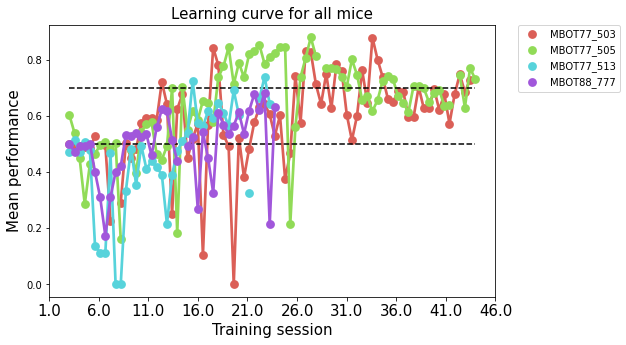

In [8]:


x ='trainingDay'
y = 'meanPerformance'
hue= 'mouse'


data = concatDF

conds = (data.trainingDay>0)
data = data[conds]
palette = sns.color_palette('hls',4)
fig,ax = plt.subplots(1,1,figsize = (8,5))

ax = sns.pointplot(data = data,x=x,y=y,hue=hue,palette= palette)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Learning curve for all mice',fontsize = 15)
ax.set_xlabel('Training session',fontsize = 15)
ax.set_ylabel('Mean performance',fontsize = 15)
minX = data.trainingDay.min()
maxX = data.trainingDay.max()
#ax.set_xticklabels(labels =np.round(np.arange(minX,maxX,5),1),fontsize = 15)
ax.xaxis.set_major_locator(ticker.LinearLocator(10))
ax.set_xticklabels(labels =np.round(np.arange(minX,maxX,5),0),fontsize = 15)
ax.axes.hlines(0.5,0,data[x].max()-data[x].min(),linestyles='dashed',color='black')
ax.axes.hlines(0.70,0,data[x].max()-data[x].min(),linestyles='dashed',color='black')
plt.show()

C:\ProgramData\Anaconda3\envs\iblenv\lib\site-packages\ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


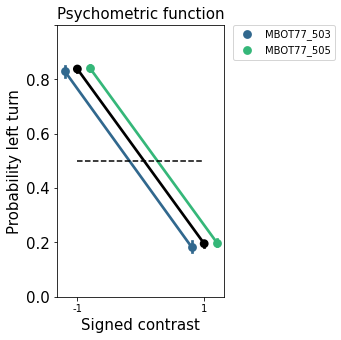

In [9]:
x ='stim_pos_init'
y = 'LeftTurn'
hue= 'mouse'
minTrial = 30
maxTrial = 1000


data = concatDF

conds = (data.meanPerformance>0.75)& (data.trial_num>minTrial)& (data.trial_num<maxTrial) & ~(data.mouse.isin(['MBOT22_143','MBOT24_478']))
data = data[conds]
palette = sns.color_palette('viridis',len(data[hue].unique()))
fig,ax = plt.subplots(1,1,figsize = (3,5))
order = [1,0.5,0.25,0,-0.25,-0.5,-1]
ax = sns.pointplot(data = data,x=x,y=y,hue=hue,palette= palette,aspect = 1.5,dodge=0.2)
ax = sns.pointplot(data = data,x=x,y=y,color='black',aspect = 1.5,dodge=0.2)
#ax = sns.pointplot(data = data,x=x,y=y)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Psychometric function',fontsize = 15)
ax.set_xlabel('Signed contrast',fontsize = 15)
ax.set_ylabel('Probability left turn',fontsize = 15)
ax.set_ylim(0,1)
#ax.set_xticklabels([-45,45],fontsize = 15)
ax.set_yticklabels(labels =np.round(np.arange(0,1,0.2),2),fontsize = 15)
ax.axes.hlines(0.5,0,1,linestyles='dashed',color='black')
# ax.axes.hlines(0.70,0,data[x].max()-data[x].min(),linestyles='dashed',color='black')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\ProgramData\Anaconda3\envs\iblenv\lib\site-packages\ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


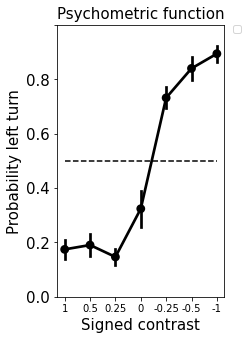

In [14]:
x ='signedContrast'
y = 'LeftTurn'
hue= 'mouse'
minTrial = 30
maxTrial = 1000


data = concatDF

conds = (data.NcontrastsDisplayed>1)&(data.meanPerformance>0.65)& (data.trial_num>minTrial)& (data.trial_num<maxTrial) & ~(data.mouse.isin(['MBOT22_143','MBOT24_478']))
data = data[conds]
palette = sns.color_palette('viridis',len(data[hue].unique()))
fig,ax = plt.subplots(1,1,figsize = (3,5))
order = [1,0.5,0.25,0,-0.25,-0.5,-1]
#ax = sns.pointplot(data = data,x=x,y=y,hue=hue,palette= palette,order = order,alpha = 0.5,aspect = 1.5,dodge=0.2)
ax = sns.pointplot(data = data,x=x,y=y,color='black',order = order,aspect = 1.5,dodge=0.2,linewidtth=4)
#ax = sns.pointplot(data = data,x=x,y=y)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Psychometric function',fontsize = 15)
ax.set_xlabel('Signed contrast',fontsize = 15)
ax.set_ylabel('Probability left turn',fontsize = 15)
ax.set_ylim(0,1)
#ax.set_xticklabels([-45,45],fontsize = 15)
ax.set_yticklabels(labels =np.round(np.arange(0,1,0.2),2),fontsize = 15)
ax.axes.hlines(0.5,0,6,linestyles='dashed',color='black')
# ax.axes.hlines(0.70,0,data[x].max()-data[x].min(),linestyles='dashed',color='black')
plt.show()

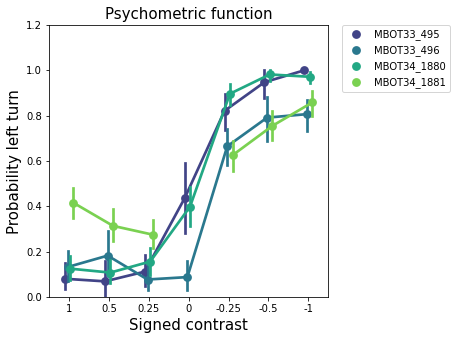

In [41]:
x ='signedContrast'
y = 'LeftTurn'
hue= 'mouse'
minTrial = 0
maxTrial = 1000


data = concatDF
order = [1,0.5,0.25,0,-0.25,-0.5,-1]
conds = (data.NcontrastsDisplayed>1)&(data.meanPerformance>0.0)& (data.trial_num>minTrial)& (data.trial_num<maxTrial) & ~(data.mouse.isin(['MBOT22_143','MBOT24_478']))
data = data[conds]
palette = sns.color_palette('viridis',len(data[hue].unique()))
fig,ax = plt.subplots(1,1,figsize = (5,5))

#ax = sns.regplot(data = data,x=x,y=y)
ax = sns.pointplot(data = data,x=x,y=y,hue='mouse',palette=palette,order = order,aspect = 1,dodge=0.2)
#ax = sns.pointplot(data = data,x=x,y=y)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Psychometric function',fontsize = 15)
ax.set_xlabel('Signed contrast',fontsize = 15)
ax.set_ylabel('Probability left turn',fontsize = 15)
ax.set_ylim(0,1.2)
# #ax.set_xticklabels([-45,45],fontsize = 15)
# ax.set_yticklabels(labels =np.round(np.arange(0,1,0.2),2),fontsize = 15)
# ax.axes.hlines(0.5,0,6,linestyles='dashed',color='black')
# ax.axes.hlines(0.70,0,data[x].max()-data[x].min(),linestyles='dashed',color='black')

analysisDir = r'C:\Users\behavior\Desktop\moriBehaviorScripts\outputData//'
plt.savefig(analysisDir + 'PsychometricFunctionsExperts.pdf')
plt.savefig(analysisDir + 'PsychometricFunctionsExperts.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


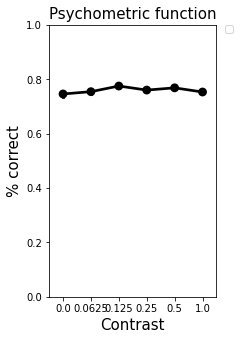

In [27]:
x ='stim_contrast'
y = 'meanPerformance'
hue= 'mouse'
minTrial = 30
maxTrial = 1000


data = concatDF

conds =(data[x]<2)&(data.NcontrastsDisplayed>1)&(data.meanPerformance>0.0)& (data.trial_num>minTrial)& (data.trial_num<maxTrial) & ~(data.mouse.isin(['MBOT22_143','MBOT24_478']))
data = data[conds]
palette = sns.color_palette('viridis',len(data[hue].unique()))
fig,ax = plt.subplots(1,1,figsize = (3,5))
order = [1,0.5,0.25,0,-0.25,-0.5,-1]
#ax = sns.pointplot(data = data,x=x,y=y,hue=hue,palette= palette,alpha = 0.5,aspect = 1.5,dodge=0.2)
ax = sns.pointplot(data = data,x=x,y=y,color='black',aspect = 1.5,dodge=0.2)
#ax = sns.pointplot(data = data,x=x,y=y)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Psychometric function',fontsize = 15)
ax.set_xlabel('Contrast',fontsize = 15)
ax.set_ylabel('% correct',fontsize = 15)
ax.set_ylim(0,1)

#ax.set_xticklabels([-45,45],fontsize = 15)
#ax.set_yticklabels(labels =np.round(np.arange(0,1,0.2),2),fontsize = 15)
#ax.axes.hlines(0.5,0,6,linestyles='dashed',color='black')
# ax.axes.hlines(0.70,0,data[x].max()-data[x].min(),linestyles='dashed',color='black')
plt.show()

# Save data frame! 

In [40]:
outname = analysisDir + 'DF_2022-02-28to2022-03-07.csv'

concatDF.to_csv(outname)

In [28]:
concatDF.date.unique()

array(['2022-02-28', '2022-03-01', '2022-03-02', '2022-03-04',
       '2022-03-05', '2022-03-07', '2022-03-03', '2022-03-06'],
      dtype=object)

In [ ]:
basePath

In [ ]:
x ='signedContrast'
y = 'LeftTurn'
hue= 'mouse'
minTrial = 30
maxTrial = 300


data = concatDF

conds = (data.mouse.isin(['MBOT24_481']))&(data.date.isin(['2021-10-29']))
data = data[conds]
data['stim_contrast']

In [ ]:
x ='stim_pos_init'
y = 'meanPerformance'
hue= 'mouse'
minTrial = 30
maxTrial = 300


data = concatDF

conds = (data.meanPerformance>0.65)& (data.trial_num>minTrial)& (data.trial_num<maxTrial) #& ~(data.mouse =='MBOT33_495')
data = data[conds].groupby('date').agg({'meanPerformance' : 'mean', 'mouse' : 'first'}).reset_index()
palette = sns.color_palette('viridis',len(data[hue].unique()))
fig,ax = plt.subplots(1,1,figsize = (3,5))

ax = sns.pointplot(data = data,x=hue,y=y,hue=hue,palette=palette)

#ax = sns.pointplot(data = data,x=x,y=y)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Performance in experts',fontsize = 15)
ax.set_xlabel('Expert mice',fontsize = 15)
ax.set_ylabel('Mean Performance',fontsize = 15)
ax.set_ylim(0,1.2)

ax.set_yticklabels(labels =np.round(np.arange(0,1.2,0.2),2),fontsize = 15)
ax.set_xticklabels(labels =[1,2,3,4],fontsize = 15)
# ax.axes.hlines(0.5,0,data[x].max()-data[x].min(),linestyles='dashed',color='black')
# ax.axes.hlines(0.70,0,data[x].max()-data[x].min(),linestyles='dashed',color='black')
plt.show()